# Neural & Behavioral Modeling - Week 3 (Exercises)
by Ting-Yu,Lin (tylin.amice@gmail.com)

In [15]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

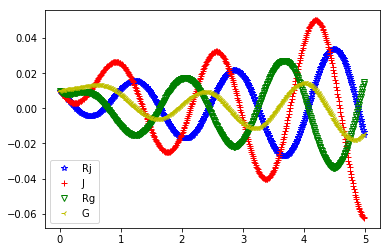

In [342]:
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters

rj,j,rg,g=[0.01],[0.01],[0.01],[0.01] # Initial values

dt=.01 # step size for numerical integration

t=arange(0,5,dt) # integration period

for i in t[0:-1]:
    rj1,j1,rg1,g1 = rj[-1],j[-1],rg[-1],g[-1] # the last element
    
    rj2= rj1 + dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1))) # Euler integration
    j2 = j1 + dt*(c*rj1*(1-abs(rj1))+d*j1) # Euler integration
    rg2 = rg1 + dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1))) # Euler integration
    g2 = g1 + dt*(e*rg1*(1-abs(rg1))+f*g1) # Euler integration
    
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
    

plot(t,rj,'b*',markerfacecolor='None') # Rj
plot(t,j,'r+',markerfacecolor='None') # J
plot(t,rg,'gv',markerfacecolor='None') # Rg
plot(t,g,'y3',markerfacecolor='None') # G

legend(['Rj','J','Rg','G']);

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

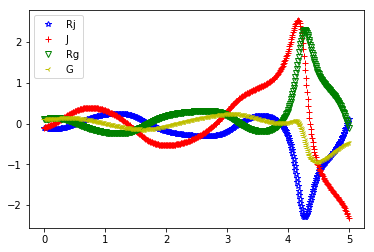

In [343]:
# Run your simulation with the 1st set of initial values here
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters

rj,j,rg,g=[-0.1],[-0.1],[0.1],[0.1] # Initial values

dt=.01 # step size for numerical integration

t=arange(0,5,dt) # integration period

for i in t[0:-1]:
    rj1,j1,rg1,g1 = rj[-1],j[-1],rg[-1],g[-1] # the last element
    
    rj2= rj1 + dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1))) # Euler integration
    j2 = j1 + dt*(c*rj1*(1-abs(rj1))+d*j1) # Euler integration
    rg2 = rg1 + dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1))) # Euler integration
    g2 = g1 + dt*(e*rg1*(1-abs(rg1))+f*g1) # Euler integration
    
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
     
plot(t,rj,'b*',markerfacecolor='None') # Rj
plot(t,j,'r+',markerfacecolor='None') # J
plot(t,rg,'gv',markerfacecolor='None') # Rg
plot(t,g,'y3',markerfacecolor='None') # G

legend(['Rj','J','Rg','G']);

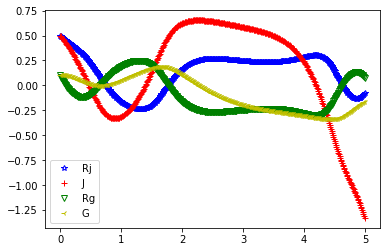

In [337]:
# Run your simulation with the 2nd set of initial values here
a,b,c,d,e,f=-3,4,-7,2,2,-1 # Model parameters

rj,j,rg,g=[0.5],[0.5],[0.1],[0.1] # Initial values

dt=.01 # step size for numerical integration

t=arange(0,5,dt) # integration period

for i in t[0:-1]:
    rj1,j1,rg1,g1 = rj[-1],j[-1],rg[-1],g[-1] # the last element
    
    rj2= rj1 + dt*(a*rj1+b*(j1-g1)*(1-abs(j1-g1))) # Euler integration
    j2 = j1 + dt*(c*rj1*(1-abs(rj1))+d*j1) # Euler integration
    rg2 = rg1 + dt*(a*rg1+b*(g1-j1)*(1-abs(g1-j1))) # Euler integration
    g2 = g1 + dt*(e*rg1*(1-abs(rg1))+f*g1) # Euler integration
    
    rj.append(rj2)
    j.append(j2)
    rg.append(rg2)
    g.append(g2)
    
plot(t,rj,'b*',markerfacecolor='None') # Rj
plot(t,j,'r+',markerfacecolor='None') # J
plot(t,rg,'gv',markerfacecolor='None') # Rg
plot(t,g,'y3',markerfacecolor='None') # G

legend(['Rj','J','Rg','G']);

## 2 Fix the simulation of "Tragedy of the Commons" (5 points)

Tren's simulation of <a href="https://en.wikipedia.org/wiki/System_archetype#Tragedy_of_the_commons">Tragedy of the Commons</a> ported from STELLA to PYTHON did not reproduce the follow model dynamics:

<img src= http://wiki.mbalib.com/w/images/1/13/%E5%85%B1%E5%90%8C%E7%9A%84%E6%82%B2%E5%89%A7%E6%A8%A1%E6%8B%9F%E7%BB%93%E6%9E%9C.jpg>

Please help Tren to fix his broken(?) simulation:

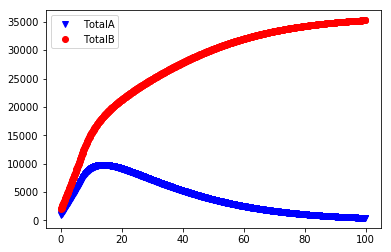

In [14]:
TotalRes=100 # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
dt=.1 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500
    ProjectB=TotalB1/600
    ResPerProject=TotalRes/(ProjectA+ProjectB)
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration
    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);

Please ignore the physical meanings of those obscure expressions like the definition of Risk:

<center><i>Risk=0 if ResPerProject >= 3 else (3-ResPerProject)</i></center>

Just by looking at Tren's figure, we know that TotalB did not collapse like TotalA when the resource per project (i.e., ResPerProject) became exhausted.

Please check the excitation and inhibiton terms for "TotalA" & "TotalB" and do whatever you can to collapse both variables for small ResPerProject. Note that this is exactly the thinking/experimental process of how a modeller revises his/her model to better fit data.

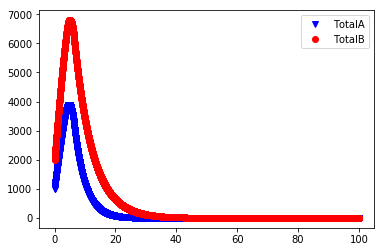

In [328]:
TotalRes=[100] # Model parameter
TotalA,TotalB=[1000],[2000] # Initial value
dt=.01 # step size for numerical integration
t=arange(0,100,dt) # integration period
for i in t:
    TotalA1,TotalB1=TotalA[-1],TotalB[-1] # the last element
    ProjectA=TotalA1/500 #可以有幾個project 
    ProjectB=TotalB1/600 #
    ResPerProject=TotalRes[-1]/(ProjectA+ProjectB) #每一個project分到的錢
    Risk=0 if ResPerProject >= 3 else (3-ResPerProject)    #如果每一個project分到的錢>3則沒有風險, 但如果拿到的錢<3則有風險
    #每個project收入+每個project可以分到錢-每個project的風險
    IncomeA=ProjectA*10+ProjectA*ResPerProject*20-Risk*ProjectA*50
    IncomeB=ProjectB*20+ProjectB*ResPerProject*20-Risk*ProjectB*40
    #TotalRes = TotalRes-(ProjectA+ProjectB)
    

    Total = TotalRes[-1]-(ProjectA+ProjectB)*0.01 #共同的資源會耗竭, 下限為0

    if Total < 10:
        Total = 0
    TotalRes.append(Total)
    
    TotalA2=TotalA1+dt*IncomeA # Euler integration
    TotalB2=TotalB1+dt*IncomeB # Euler integration

    TotalA.append(TotalA2)
    TotalB.append(TotalB2)
    
plot(t,TotalA[0:-1],'bv')
plot(t,TotalB[0:-1],'ro')
legend(['TotalA','TotalB']);